In [177]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
from scipy.stats import norm, shapiro, anderson
import pylab
import pandas_profiling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.utils import shuffle

In [96]:
mathematics = pd.read_csv('./data/student_mat.csv')
portuegese = pd.read_csv('./data/student_por.csv')
mat = mathematics.copy()
por = portuegese.copy()

# <div align="center">Merging data (only unique students)</div>

In [156]:
merged = pd.merge(mat, por, how='inner', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu",
                                         "Mjob","Fjob","reason","nursery","internet"])
merged.drop(['guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'higher_x', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'], axis=1, inplace = True)
s = 0
for index, row in por.iterrows():
     if ((merged['school'] == row['school']) & (merged['sex'] == row['sex']) & (merged['age'] == row['age']) & 
         (merged['address'] == row['address']) & (merged['famsize'] == row['famsize']) & (merged['Pstatus'] == row['Pstatus']) &
         (merged['Medu'] == row['Medu']) & (merged['Fedu'] == row['Fedu']) & (s1['Mjob'] == row['Mjob']) &
        (merged['Fjob'] == row['Fjob']) & (merged['reason'] == row['reason']) & 
         (merged['nursery'] == row['nursery']) & (merged['internet'] == row['internet'])).any():
            por.drop(index, inplace=True)
mat_por = mat.append(por)

# <div align="center">Encoding binary data </div>

In [98]:
mat_por['schoolsup'] = mat_por['schoolsup'].replace({'yes':1, 'no':0})
mat_por['famsup'] = mat_por['famsup'].replace({'yes':1, 'no':0})
mat_por['paid'] = mat_por['paid'].replace({'yes':1, 'no':0})
mat_por['activities'] = mat_por['activities'].replace({'yes':1, 'no':0})
mat_por['nursery'] = mat_por['nursery'].replace({'yes':1, 'no':0})
mat_por['higher'] = mat_por['higher'].replace({'yes':1, 'no':0})
mat_por['internet'] = mat_por['internet'].replace({'yes':1, 'no':0})
mat_por['romantic'] = mat_por['romantic'].replace({'yes':1, 'no':0})

# <div align="center">Data Cleaning</div>

## 1. Missing data

In [99]:
mat_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0
611,MS,F,18,R,GT3,T,2,2,services,other,...,4,2,1,1,1,4,5,14,14,15
618,MS,F,18,R,LE3,A,1,2,at_home,other,...,4,3,4,1,4,5,0,16,15,15
632,MS,F,19,R,GT3,T,1,1,at_home,other,...,4,3,3,1,1,3,4,7,8,9


### Data does not have missing values

In [100]:
for col in mat_por.columns:
    pct_missing = np.mean(mat[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.0%
Dalc - 0.0%
Walc - 0.0%
health - 0.0%
absences - 0.0%
G1 - 0.0%
G2 - 0.0%
G3 - 0.0%


## 2. Irregular data (Outliers)

### No outliers in numerical data were found

In [101]:
df_numeric = mat_por.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    print('\n' + col)
    print(df_numeric[col].describe())


age
count    670.000000
mean      16.805970
std        1.266314
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Medu
count    670.000000
mean       2.495522
std        1.130820
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Fedu
count    670.000000
mean       2.294030
std        1.094268
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

traveltime
count    670.000000
mean       1.564179
std        0.744427
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

studytime
count    670.000000
mean       1.926866
std        0.825071
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

failures
count

### No outliers in categorical data were found

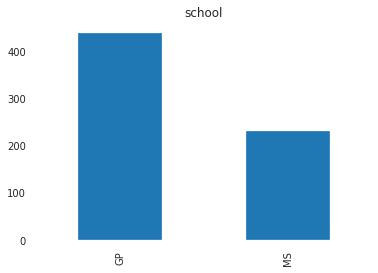

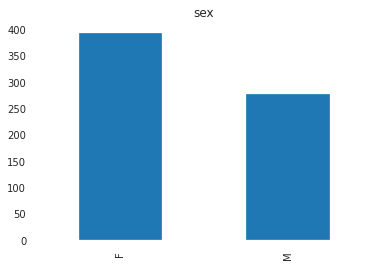

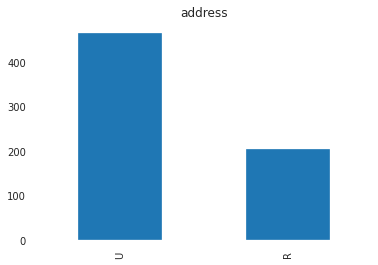

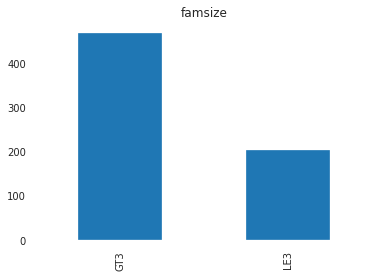

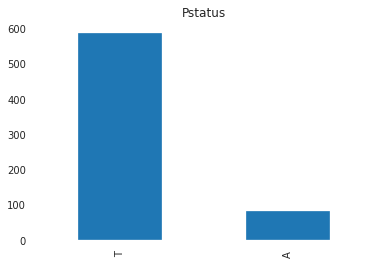

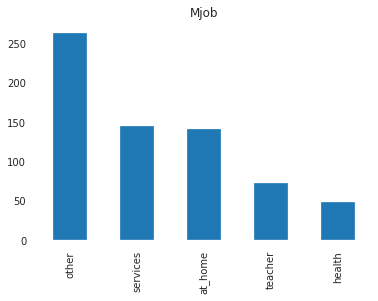

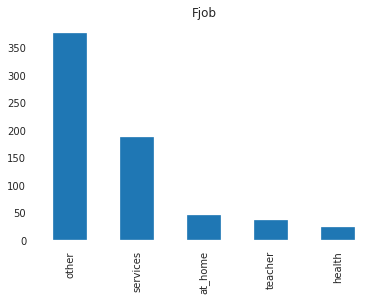

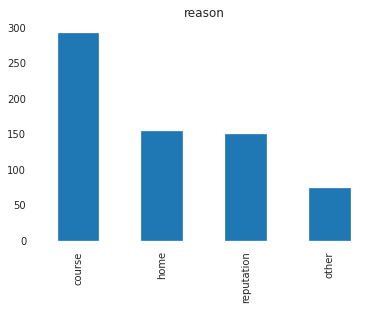

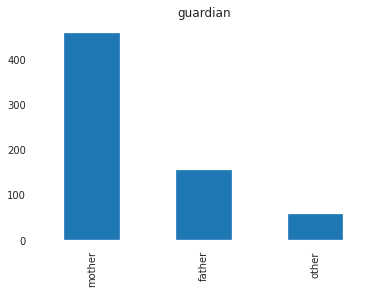

In [102]:
df_categorical = mat_por.select_dtypes(exclude=[np.number])
for col in df_categorical.columns:
    df_categorical[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

# <div align="center">Exploratory Data Analysis</div>

### What numerical values have the strongest relationship with grades?

**<ul> Strong positive correlation</ul>**
    <li>Planning to pursue a higher education</li>
    <li>Study time</li>
    <li>Mother and father education</li>
    <li>Internet access</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Previous failures</li>
    <li>Workday alcohol consumption</li>
    <li>Weekend alcohol consumption</li>
    <li>Travel time</li>
    <li>Free time</li>
    <li>Age</li>
**</ul>**
**<ul> Medium  negative correlation</ul>**
    <li>Health condition</li>
    <li>Absenses</li>
    <li>Romantic relationship</li>
**</ul>**

###  What numerical values have the strongest relationship with number of alcohol consumption?

**<ul> Strong positive correlation</ul>**
    <li>Going out</li>
    <li>Absenses</li>
    <li>Freetime</li>
    <li>Health condition</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Study time</li>
    <li>Grades</li>
    <li>Extra educational support</li>
    <li>Family relationship</li>
**</ul>**

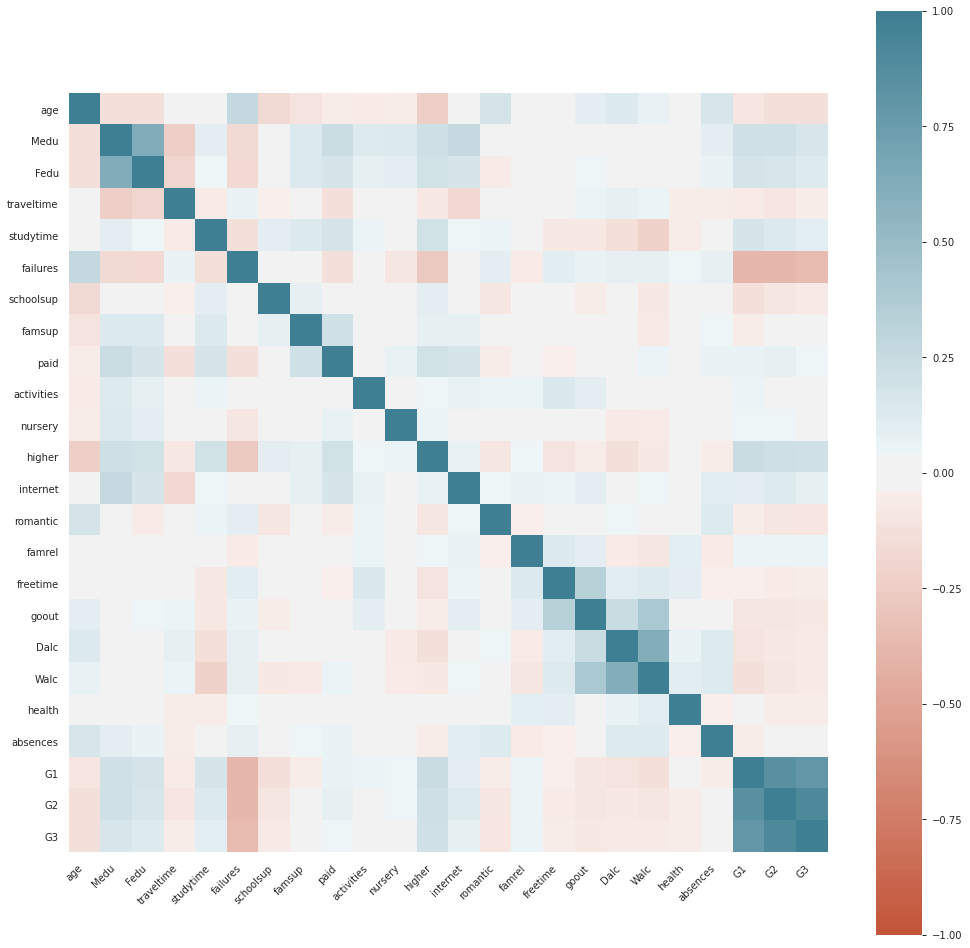

In [103]:
corr = mat_por.corr()
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

In [195]:
mat_por = mat_por[mat_por["G3"] != 0]
stat, p = shapiro(mat_por["G3"])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb04b5bfef0>]],
      dtype=object)

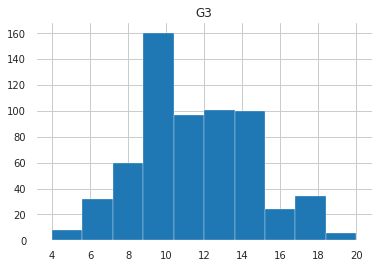

In [196]:
mat_por.hist(column="G3")

In [185]:
chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(mat_por["G3"], percentile_bins)
observed_frequency, bins = (np.histogram(mat_por["G3"], bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']
# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(mat_por["G3"])
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * len(mat_por["G3"])
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)

(2.830656303742268, 3.6042066852083385, 8.857792428539124)

(11.495176848874598, 3.0057515954602665)

(0.41604735430867235, 20.000000000000004, 1.3483185277060334)

(5.186620859153734, 8.875181931209028, 2.6052303813382798, 24.109714173470167)

(0.028257454278662636, -6.489865991649189, 635.5929144919855)

(4.0, 16.0)

(23.200047278972274, -3.020499748458382, 0.625674463031018)

(4.0, 7.495176848874598)

(0.13769047778195861, -10.292641663252878, 21.582487697500675)

(0.4151835289021275, 11.495211653104459, 3.0136761615948675)

(0.37430400528158825, 3.946834119112474, 16.171790350562183)


Distributions listed by Betterment of fit:
............................................
   Distribution   chi_square
1          norm    53.172215
8       lognorm    75.388598
9      pearson3    77.836541
6         gamma    77.844051
4      invgauss    87.918594
3          beta    89.282097
0   weibull_min    94.360787
10       triang   239.269991
5       uniform   549.161288
2   weibull_max  1839.968

In [165]:
sorted(mat_por["G3"])

[4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1

In [104]:
X = mat.select_dtypes(include=[np.number]).iloc[:, 0:-3]
y = mat.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))  

         Specs       Score
12    absences  648.166848
5     failures  140.934898
10        Walc   28.444167
9         Dalc   17.082868
1         Medu   13.894852
8        goout   10.472494
2         Fedu   10.375563
11      health   10.176668
3   traveltime    6.758151
4    studytime    6.231603


In [107]:
s1 = pd.merge(mat, por, how='inner', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu",
                                         "Mjob","Fjob","reason","nursery","internet"])
s1.drop(['guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'higher_x', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'], axis=1, inplace = True)
s = 0
for index, row in por.iterrows():
     if ((s1['school'] == row['school']) & (s1['sex'] == row['sex']) & (s1['age'] == row['age']) & 
         (s1['address'] == row['address']) & (s1['famsize'] == row['famsize']) & (s1['Pstatus'] == row['Pstatus']) &
         (s1['Medu'] == row['Medu']) & (s1['Fedu'] == row['Fedu']) & (s1['Mjob'] == row['Mjob']) &
        (s1['Fjob'] == row['Fjob']) & (s1['reason'] == row['reason']) & 
         (s1['nursery'] == row['nursery']) & (s1['internet'] == row['internet'])).any():
            por.drop(index, inplace=True)

In [108]:
X_pol_reg = mat_por.loc[:, ["Dalc", "failures", "higher", "studytime", "Medu", "goout", "absences"]]
y_pol_reg = mat_por.loc[:, "G3"]
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X_pol_reg, y_pol_reg, test_size=0.33, random_state=42)

In [109]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train_pol)
x_poly_test = polynomial_features.fit_transform(X_test_pol)

model = LinearRegression()
model.fit(x_poly, y_train_pol)
y_poly_pred = model.predict(x_poly_test)

In [110]:
rmse = np.sqrt(mean_squared_error(y_test_pol,y_poly_pred))
print(rmse)
for test, pred in zip(y_test_pol,y_poly_pred):
    print(test, pred)

2.8058308905507316
10 11.992957037822624
12 9.721801626262238
8 12.491014187987599
18 12.505978959913731
19 12.787427699632257
10 12.875599624713463
8 9.493884130021396
15 11.313488133052829
9 12.084877881478361
10 10.060197108115865
5 11.79760473678583
15 13.086212999481974
11 12.789966215965489
7 11.118523005030616
10 8.500357305573605
12 10.887609551469025
7 9.425205534607453
10 11.781746253273937
11 11.578619471333974
15 11.40378695193242
14 12.668171345966837
13 13.663594279248422
14 11.842886339634006
10 10.377982179257906
11 12.505978959913731
14 13.975568264185151
12 11.428705729296677
11 12.117650018591213
8 13.294723204290335
10 13.389336795570214
9 10.8553389111016
10 10.524808064447969
16 12.189001221825487
10 9.8074687275401
6 11.940903672630284
10 11.76854055685623
9 12.480640691953653
10 12.359936213064158
8 9.889894711849589
13 10.858279395488307
15 13.389336795570214
11 12.168186328238889
11 11.7165796893448
14 13.912020701775297
11 12.033294140509122
10 12.09292908123

In [111]:
all_students = mat_por.copy()
all_students.loc[all_students["Dalc"] <3, "Dalc"] = 0
all_students.loc[all_students["Dalc"] >= 3, "Dalc"]=1
ones = all_students[all_students["Dalc"]==1]

In [139]:
zeros = all_students[all_students["Dalc"]==0].iloc[0:240,:]
zeros = zeros.append(ones)

In [140]:
X = zeros.loc[:, ["schoolsup", "famrel", "G3", "studytime", "freetime", "goout", "absences"]]
y = zeros.loc[:, "Dalc"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/olha/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [152]:
for t, p in zip(y_test,y_pred):
    print(t, p)

0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
0 1
0 0
0 0
0 0
0 1
1 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 1
0 1
0 1
1 0
0 0
0 0
1 0
0 0
